In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from matplotlib import rcParams

In [38]:
rcParams["figure.figsize"] = 6, 6
sns.set(color_codes=True)

In [18]:
df = pd.read_csv("csv/new_csv/cleaned_data.csv")
df.head()

,name,mark,year,mileage,engine_power_kW,engine_power_hp,fuel_type,consumption_(l/100 km),ecology_(gCO2/km),gearbox,price,currency,country,engine_size,nr_of_accidents,color_exterior,color_interior,price_eur
0,daewoo rezzo,daewoo,2003,200000.0,89.0,121.0,Gasoline,9.0,236.0,Manual,199.0,EUR,Germany,0.0,NaN,unknown,unknown,199.0
1,volkswagen golf,volkswagen,1994,222275.0,55.0,75.0,Gasoline,0.0,0.0,Manual,200.0,EUR,Germany,0.0,NaN,unknown,unknown,200.0
2,ford fiesta,ford,2001,153000.0,44.0,60.0,Gasoline,7.3,171.0,Manual,290.0,EUR,Germany,0.0,NaN,unknown,unknown,290.0
3,volkswagen polo,volkswagen,1999,154000.0,44.0,60.0,Gasoline,6.3,151.0,Manual,350.0,EUR,Germany,0.0,NaN,unknown,unknown,350.0
4,nissan micra,nissan,1998,140000.0,40.0,54.0,Gasoline,6.0,152.0,Manual,380.0,EUR,Germany,0.0,NaN,unknown,unknown,380.0


In [19]:
df = df.drop(["price", "currency", "engine_power_kW"], axis=1)
df.rename(columns={"engine_power_hp":"engine_power",
                  "ecology_(gCO2/km)":"ecology",
                  "consumption_(l/100 km)":"consumption",
                  "price_eur":"price",
                  "color_exterior":"exterior",
                  "color_interior":"interior",
                  "nr_of_accidents":"accidents",
                  "fuel_type":"fuel"
                  }, inplace=True)

In [20]:
df.isna().sum()

name               0
mark               0
year               0
mileage            0
engine_power    1342
fuel               0
consumption     1391
ecology         1387
gearbox            0
country            0
engine_size        0
accidents       1127
exterior           0
interior           0
price              0
dtype: int64

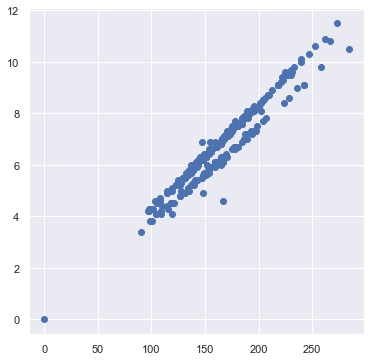

In [39]:
plt.scatter(df.ecology, df.consumption)
plt.show()

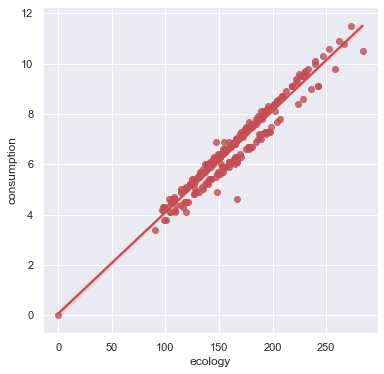

In [96]:
sns.regplot(df.ecology, df.consumption, color="r")
plt.show()

In [90]:
df2 = df[~(df.ecology.isna()) & ~(df.consumption.isna())]
x = np.array(df2.ecology).reshape(-1, 1)
y = np.array(df2.consumption).reshape(-1, 1)
df_ecology

,name,mark,year,mileage,engine_power,fuel,consumption,ecology,gearbox,country,engine_size,accidents,exterior,interior,price
0,daewoo rezzo,daewoo,2003,200000.0,121.0,Gasoline,9.0,236.0,Manual,Germany,0.0,NaN,unknown,unknown,199.0
1,volkswagen golf,volkswagen,1994,222275.0,75.0,Gasoline,0.0,0.0,Manual,Germany,0.0,NaN,unknown,unknown,200.0
2,ford fiesta,ford,2001,153000.0,60.0,Gasoline,7.3,171.0,Manual,Germany,0.0,NaN,unknown,unknown,290.0
3,volkswagen polo,volkswagen,1999,154000.0,60.0,Gasoline,6.3,151.0,Manual,Germany,0.0,NaN,unknown,unknown,350.0
4,nissan micra,nissan,1998,140000.0,54.0,Gasoline,6.0,152.0,Manual,Germany,0.0,NaN,unknown,unknown,380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,mercedes-benz clk 200,mercedes,2000,94931.0,136.0,Gasoline,9.6,225.0,Automatic,Germany,0.0,NaN,unknown,unknown,5090.0
353,renault megane,renault,2010,96133.0,110.0,Diesel,4.4,110.0,Automatic,Germany,0.0,NaN,unknown,unknown,5190.0
354,opel corsa,opel,2012,91158.0,87.0,Gasoline,5.7,135.0,Manual,Germany,0.0,NaN,unknown,unknown,5200.0
355,toyota yaris,toyota,2010,94200.0,69.0,Gasoline,5.0,115.0,Manual,Germany,0.0,NaN,unknown,unknown,5200.0


## Find missing consumption variables with Linear Regression

In [91]:
df_test_ecology = df[(df.ecology > 0) & (df.consumption.isna())][['ecology', 'consumption']]
x_test_ecology = np.array(df_test_ecology.ecology).reshape(-1, 1)
df_test_ecology

,ecology,consumption
90,120.0,NaN
117,166.0,NaN
129,181.0,NaN
233,125.0,NaN
271,135.0,NaN
295,158.0,NaN
330,189.0,NaN


In [97]:
from sklearn.linear_model import LinearRegression

reg_ecology = LinearRegression().fit(x, y)
pred_consumption = reg_ecology.predict(x_test_ecology)
df_test_ecology['consumption'] = pred_consumption
df_test_ecology.consumption = df_test_ecology.consumption.round(1)
df_test_ecology

,ecology,consumption
90,120.0,4.9
117,166.0,6.7
129,181.0,7.4
233,125.0,5.1
271,135.0,5.5
295,158.0,6.4
330,189.0,7.7


## Find missing ecology variables with Linear Regression

In [98]:
df_test_consumption = df[(df.consumption > 0) & (df.ecology.isna())][['ecology', 'consumption']]
x_test_consumption = np.array(df_test_consumption.consumption).reshape(-1, 1)
df_test_consumption

,ecology,consumption
82,NaN,10.3
292,NaN,13.2
306,NaN,7.5
314,NaN,7.7


In [99]:
reg_cons = LinearRegression().fit(y, x)
pred_eco = reg_cons.predict(x_test_consumption)
df_test_consumption['ecology'] = pred_eco
df_test_consumption.ecology = df_test_consumption.ecology.round(1)
df_test_consumption

,ecology,consumption
82,248.9,10.3
292,316.8,13.2
306,183.4,7.5
314,188.1,7.7


## Concat tables and save the results to main table

In [104]:
df2 = pd.concat([df_test_consumption, df_test_ecology]).sort_index()
df2

,ecology,consumption
82,248.9,10.3
90,120.0,4.9
117,166.0,6.7
129,181.0,7.4
233,125.0,5.1
271,135.0,5.5
292,316.8,13.2
295,158.0,6.4
306,183.4,7.5
314,188.1,7.7


In [109]:
for i in df2.index:
    df.loc[i, 'ecology'] = df2.loc[i, 'ecology']
    df.loc[i, 'consumption'] = df2.loc[i, 'consumption']
    
df.loc[i, :].to_frame()

,330
name,bmw 520
mark,bmw
year,2008
mileage,234783
engine_power,150
fuel,Diesel
consumption,7.7
ecology,189
gearbox,Automatic
country,Germany


In [112]:
df.engine_power = df.accidents.fillna(df.engine_power.mean())
df.accidents = df.accidents.fillna(df.accidents.mean())
df.consumption = df.consumption.fillna(df.consumption.mean())
df.ecology = df.ecology.fillna(df.ecology.mean())

In [113]:
df.isna().sum()

name            0
mark            0
year            0
mileage         0
engine_power    0
fuel            0
consumption     0
ecology         0
gearbox         0
country         0
engine_size     0
accidents       0
exterior        0
interior        0
price           0
dtype: int64

### Drop extreme values

In [115]:
df.shape

(1700, 15)

In [116]:
df = df[(df.price > df.price.quantile(0.01)) & (df.price < df.price.quantile(0.99))]
df.shape

(1665, 15)

Text(0.5, 1, 'Correlations in the dataset')

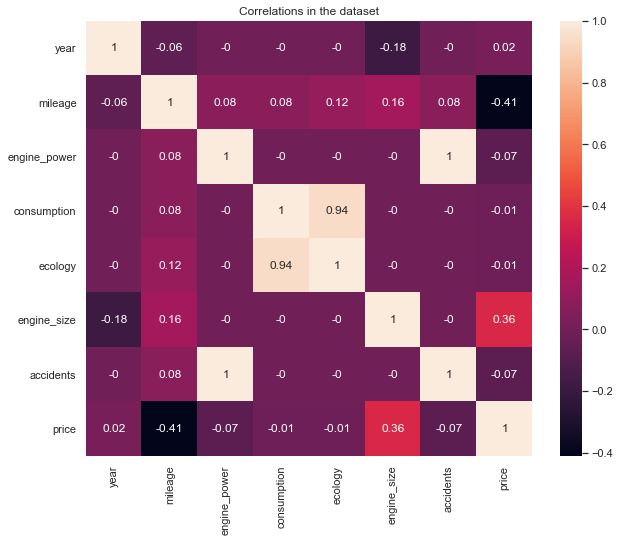

In [166]:
rcParams["figure.figsize"] = 10, 8
sns.heatmap(df.corr().round(2), annot=True).set_title('Correlations in the dataset')

In [148]:
df_sort = df.groupby(['mark']).agg({'price':["mean", "count"]})
df_sort = df_sort.sort_values(by=[('price', 'mean'), ('price', 'count')], ascending=False)
df_sort.head(20)

price      
                   mean count
mark                         
aston     107607.720000     1
maserati   88157.236667     3
maybach    62500.000000     1
doosan     54950.820000     3
bentley    49320.594000     5
porsche    35627.424000     5
jaguar     28073.230000     5
ram        26699.462500     8
infiniti   23806.956000     5
cadillac   23021.070000     1
rover      22785.362963    27
mercedes   21988.042842   190
lexus      20937.984000    10
ds         20475.200000     2
jeep       19297.858824    17
stokota    19116.590000     1
lincoln    18102.530000     1
alfa       17248.298333     6
audi       16579.074333    60
chrysler   16245.949091    11

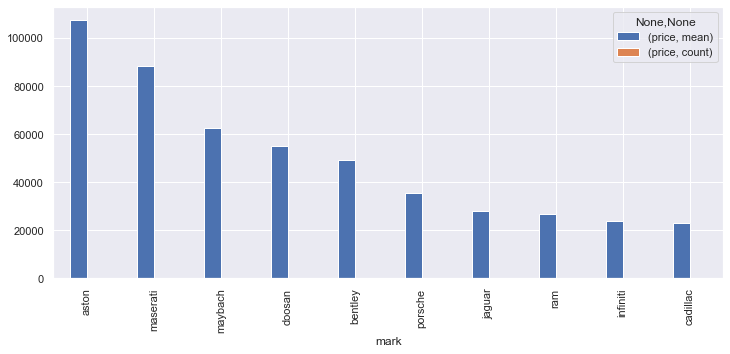

In [149]:
df_sort[:10].plot(kind="bar", figsize=(12, 5))

In [150]:
df.describe(include="all")

,name,mark,year,mileage,engine_power,fuel,consumption,ecology,gearbox,country,engine_size,accidents,exterior,interior,price
count,1665,1665,1665.000000,1665.000000,1665.000000,1665,1665.000000,1665.000000,1665,1665,1665.000000,1665.000000,1665,1665,1665.000000
unique,1102,69,NaN,NaN,NaN,9,NaN,NaN,4,5,NaN,NaN,12,7,NaN
top,dodge grand caravan sxt,ford,NaN,NaN,NaN,unknown,NaN,NaN,unknown,United States,NaN,NaN,unknown,unknown,NaN
freq,48,192,NaN,NaN,NaN,636,NaN,NaN,971,571,NaN,NaN,1094,1094,NaN
mean,NaN,NaN,1949.252252,118854.329129,0.206181,NaN,6.651532,162.998491,NaN,NaN,845.511111,0.206181,NaN,NaN,12717.769892
std,NaN,NaN,350.172042,99181.967185,0.289660,NaN,0.674701,16.672983,NaN,NaN,1156.540007,0.289660,NaN,NaN,13729.942970
min,NaN,NaN,0.000000,0.000000,0.000000,NaN,3.400000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,490.000000
25%,NaN,NaN,2007.000000,45462.000000,0.000000,NaN,6.650000,162.959621,NaN,NaN,0.000000,0.000000,NaN,NaN,3998.000000
50%,NaN,NaN,2013.000000,91978.000000,0.205934,NaN,6.650000,162.959621,NaN,NaN,0.000000,0.205934,NaN,NaN,9350.100000
75%,NaN,NaN,2018.000000,179448.000000,0.205934,NaN,6.650000,162.959621,NaN,NaN,1685.000000,0.205934,NaN,NaN,15498.490000


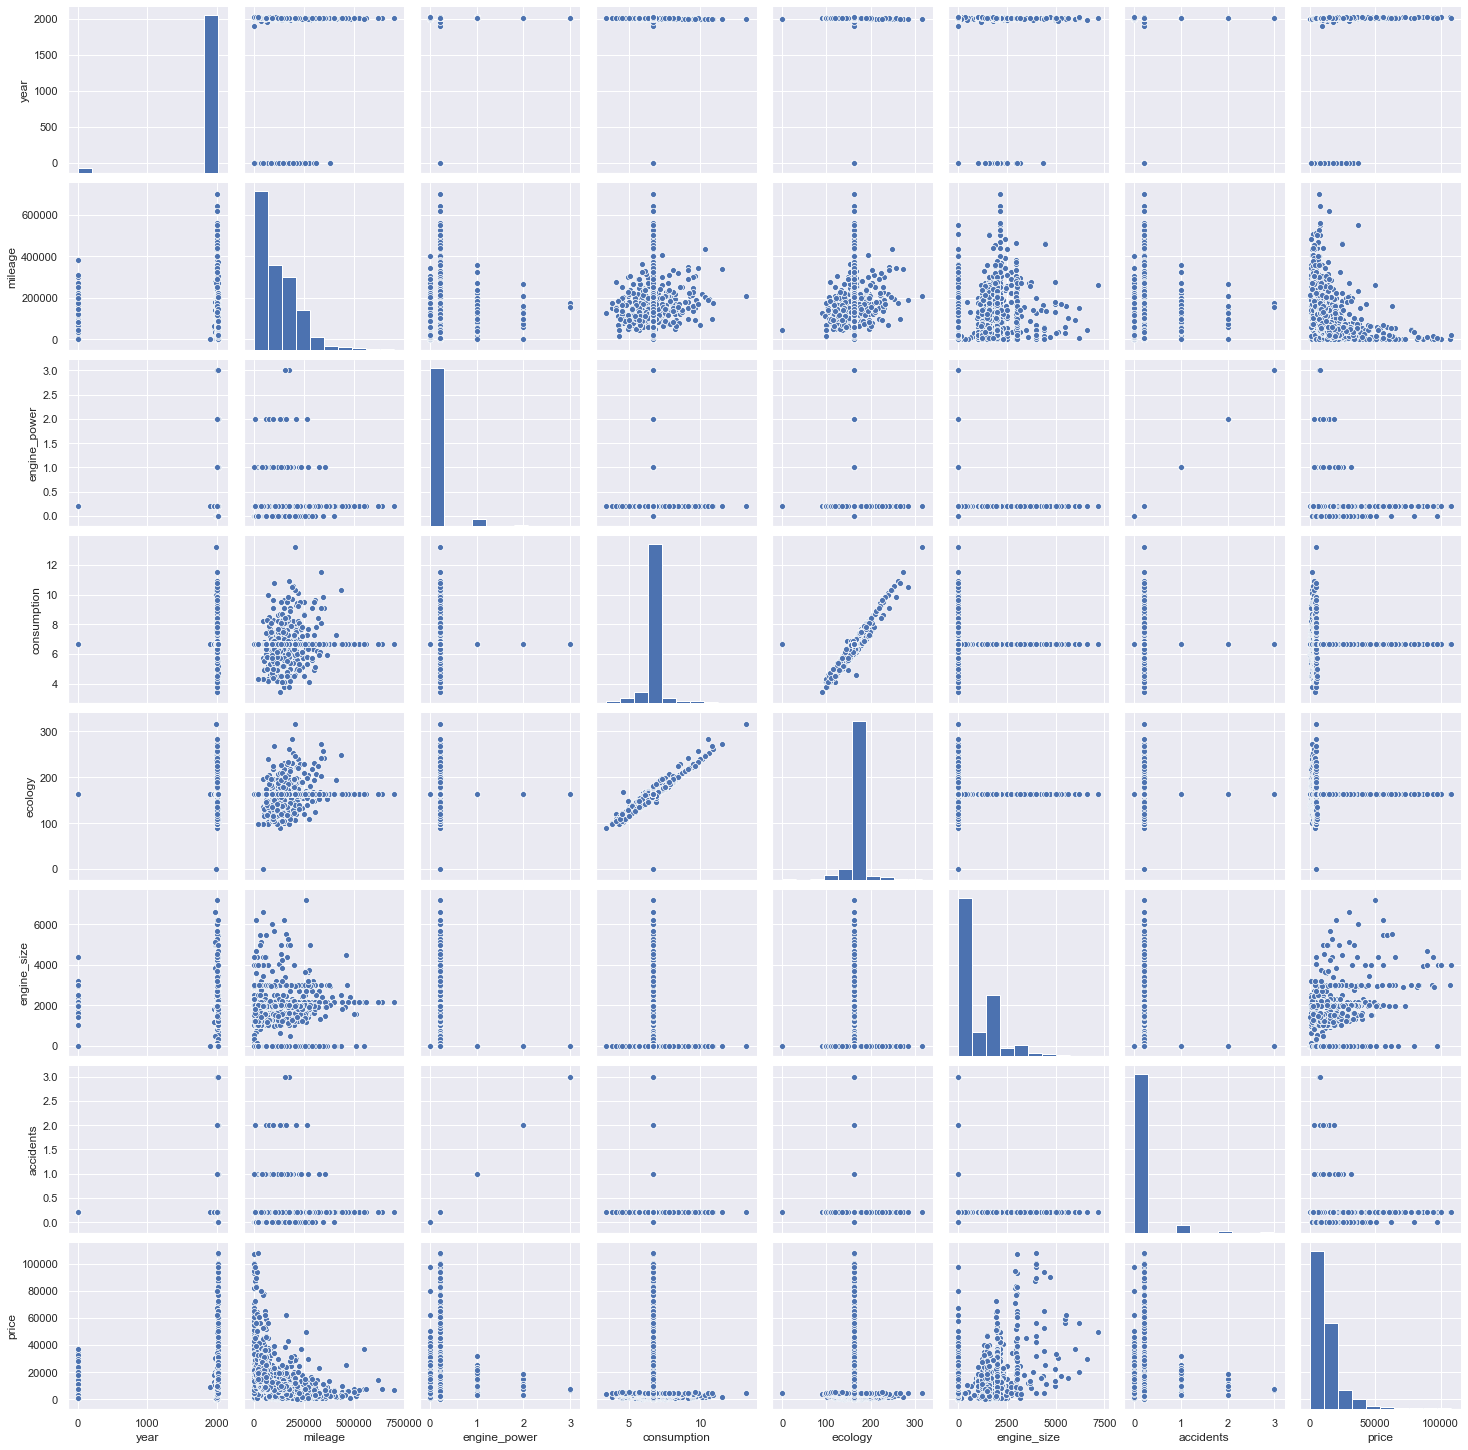

In [161]:
sns.pairplot(df)

In [162]:
df.to_csv("csv/data_no_na.csv", index=False)